# Aprendizaje Supervisado
 ## Regresión  Lineal

Aprender la forma de *y* a partir de un conjunto de atributos/features *X*  tomando como muestra un conjunto de rows.


## 1. atributos = variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Generamos un dataset simulado de una función con np.linespace(desde, hasta, cantidadÑpuntos).
* 500 puntos provenientes de una relación lineal 1-D de la forma $y = X**2 + ruido


In [7]:
n = 500
X = np.linspace(-2,3,n)
#y_real = 3*X - 2
y_real = X**2

y = y_real + 1.0*np.random.randn(n)

Siguiendo la idea de la "recta que pasa a la menor distnacia de los puntos" ¿Por qué no hacer lo mismo con una curva?

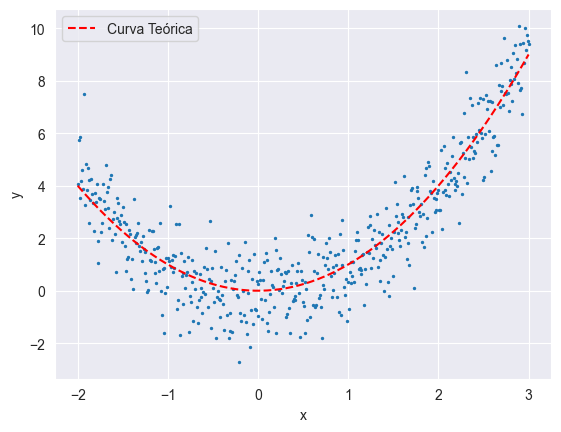

In [8]:
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Sklearn

## train_test_split

In [9]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Nosotros tenemos datos. No sabemos que tienen una formula definida de X elevado al cuadrado más un ruido. Pero suponemos que podemos encontrar el patrón que se esconde a partir del dato.

In [11]:
X_train

array([[-1.9498998 ],
       [-0.83767535],
       [-1.5490982 ],
       [-1.83967936],
       [ 2.62925852],
       [ 1.57715431],
       [-1.96993988],
       [ 0.18436874],
       [ 2.05811623],
       [-1.3987976 ],
       [-0.89779559],
       [ 1.18637275],
       [ 2.28857715],
       [-1.70941884],
       [ 2.37875752],
       [ 2.71943888],
       [-1.73947896],
       [-1.92985972],
       [ 2.53907816],
       [-0.91783567],
       [-1.62925852],
       [-0.42685371],
       [ 2.8997996 ],
       [-0.81763527],
       [-0.85771543],
       [-0.24649299],
       [ 1.73747495],
       [-0.18637275],
       [-0.55711423],
       [ 1.69739479],
       [ 1.90781563],
       [-0.04609218],
       [ 2.04809619],
       [ 0.75551102],
       [ 2.5490982 ],
       [-0.58717435],
       [ 1.65731463],
       [-1.32865731],
       [ 0.10420842],
       [-0.31663327],
       [ 2.93987976],
       [ 1.75751503],
       [ 2.00801603],
       [ 0.7254509 ],
       [-0.90781563],
       [ 0

Definimos los modelos y entrenamos en este momento son para nosotros cajas negras que buscan encontrar esa forma que conocemos porque la definimos.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [13]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Veamos qué aprendieron.

La regresión lineal obtiene la pendiente y la ordenada al origen.

In [14]:
print(linear_model.coef_, linear_model.intercept_)

[0.9927131] 1.6849391619120948


¿Están cerca de los valores reales? 

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

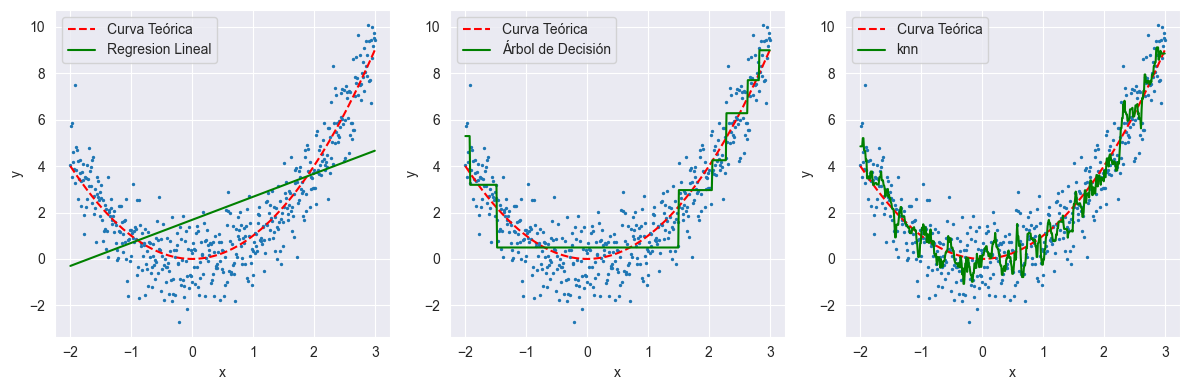

In [15]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Arbol

¿Cómo ajustaron los modelos?

¿Cómo ajusto el árbol?

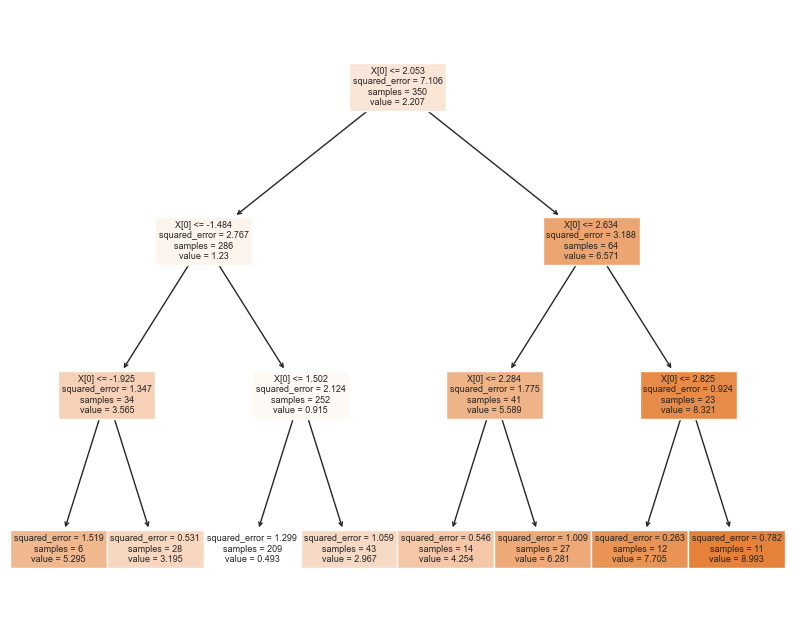

In [16]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

¿Cómo se relaciona el arbol con la curva obtenida?

Analisimos los errores con RMSE.
1. El cálculo del RMSE para cada conjunto (train y test).
1. Un gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test. ¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
1. El histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 2.265881077191991
Raíz del error cuadrático medio en Test: 2.169673231694476


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


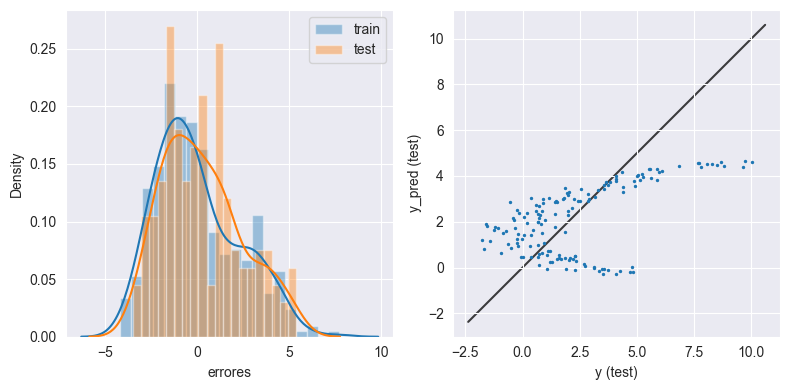

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0524406357359972
Raíz del error cuadrático medio en Test: 1.1708486333654944


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


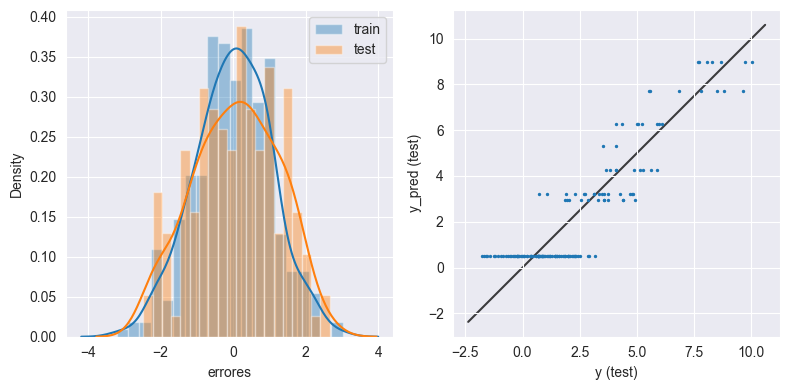

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.923177934225068
Raíz del error cuadrático medio en Test: 1.0649491010362782


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


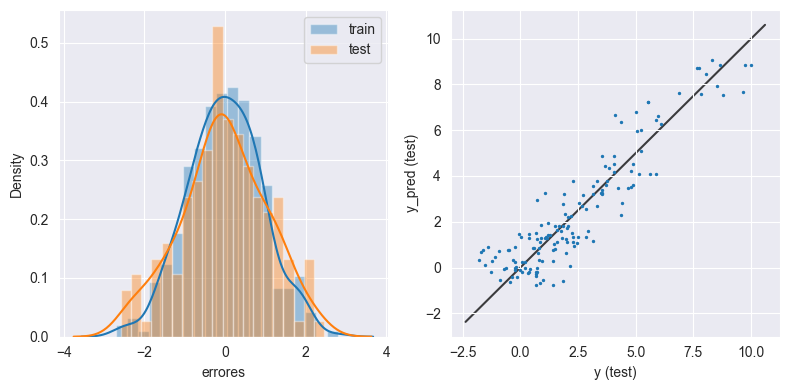

In [17]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En todos los casos, ocurre algo parecido:
1. Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
1. En el gráfico $y$ vs $y_{predicho}$ para el conjunto de test, todos los puntos están cerca de la diagonal (la relación $y = x$), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. **Importante:** asegúrate de que entiendes este gráfico (¿qué ocurre en el caso del árbol?), el hecho de que los puntos deban estar sobre la recta diagonal $y = x$ **no** está relacionado con que estamos aproximando una relación lineal.

**Para probar**: dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`. ¿Qué ocurre cuando `n_neighbors = 1`?¿Puedes diferenciar en el gráfico cuáles instancias se usaron para entrenamiento y cuáles para testeo?¿Y si `n_neighbors` tiende a la cantidad de instancias en el set de entrenamiento qué sucede?

**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Presta atención a las siguientes preguntas. ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?

## Dos variables indpendientes


In [19]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
#y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)
y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.


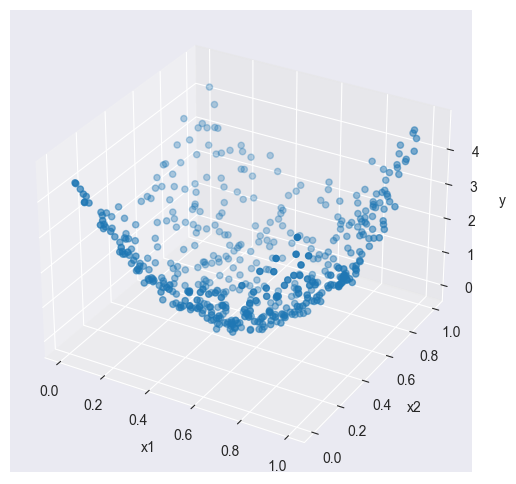

In [20]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

Creamos variables y hacemos un `train_test_split`

In [21]:
X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


In [22]:
X_train

array([[9.34824026e-01, 4.52687474e-01],
       [7.65351035e-01, 6.70574683e-01],
       [3.50948002e-01, 2.17604138e-01],
       [1.78031636e-01, 6.70068876e-01],
       [4.78189232e-01, 5.67763304e-01],
       [2.80727986e-01, 9.25634781e-01],
       [7.21028908e-01, 1.37841495e-01],
       [8.92136199e-01, 6.30069931e-01],
       [4.24595936e-01, 9.05095634e-01],
       [8.81231895e-01, 3.13358939e-02],
       [7.95340959e-01, 6.86412082e-01],
       [6.37743668e-01, 3.94230821e-01],
       [9.24757843e-01, 2.66368050e-01],
       [3.78540519e-01, 2.25330249e-01],
       [4.88414400e-02, 9.84098906e-01],
       [8.99643117e-01, 1.81829411e-01],
       [7.27927200e-01, 8.38177507e-01],
       [8.04022939e-01, 1.17474277e-01],
       [9.55464194e-01, 9.33240333e-01],
       [5.03820622e-01, 3.40346358e-01],
       [5.06543987e-01, 7.70968810e-01],
       [1.81748497e-01, 9.52560856e-02],
       [1.02544856e-01, 4.71200592e-01],
       [3.23165705e-01, 9.94383998e-01],
       [9.929650

Definimos los modelos y entrenamos

In [23]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [24]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

¿Qué patrón encontraron en lso daots?

La regresión lineal obtiene **las pendientes** y la ordenada al origen

In [25]:
print(linear_model.coef_, linear_model.intercept_)

[0.26015396 0.08884869] 1.468770187379605


En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie o mejor dicho un hiperplano. La siguiente función nos ayuda a graficar.

In [26]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

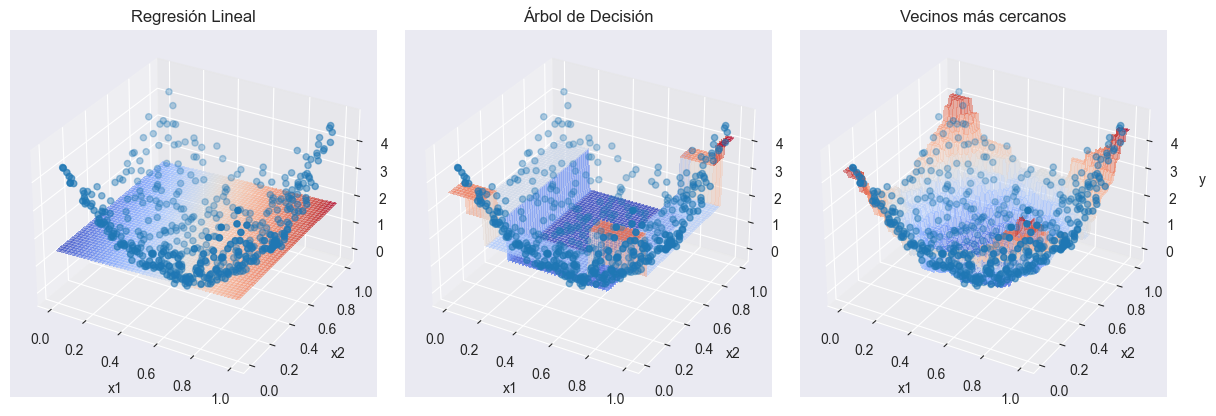

In [27]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)


ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('Vecinos más cercanos')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()



Al árbol lo entendemos más intuitivamente en su aprendizaje

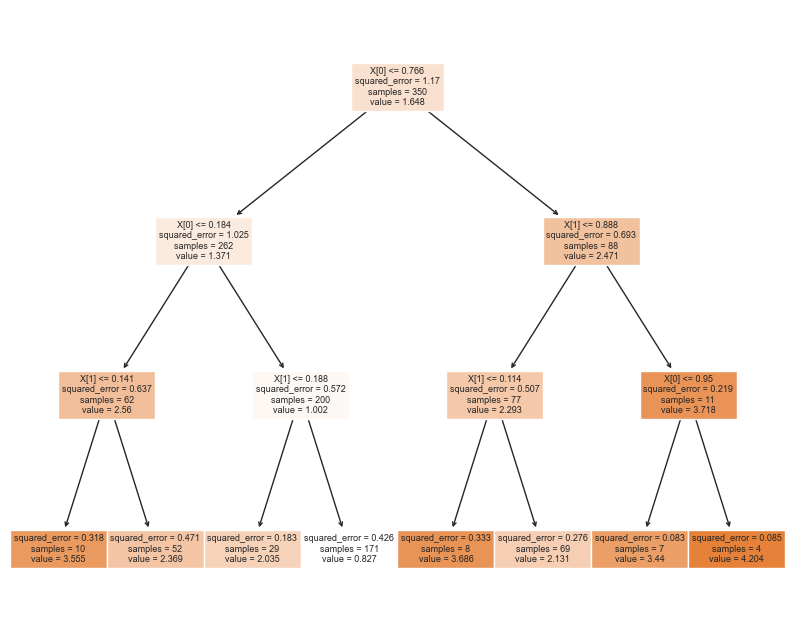

In [29]:
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Y, nuevamente, los errores.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 1.0783531012185763
Raíz del error cuadrático medio en Test: 1.090717365737032


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


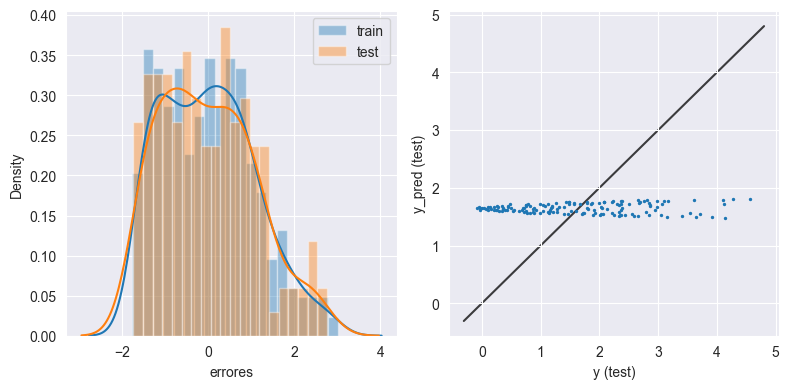

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.6057319622600686
Raíz del error cuadrático medio en Test: 0.6129721956572808


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


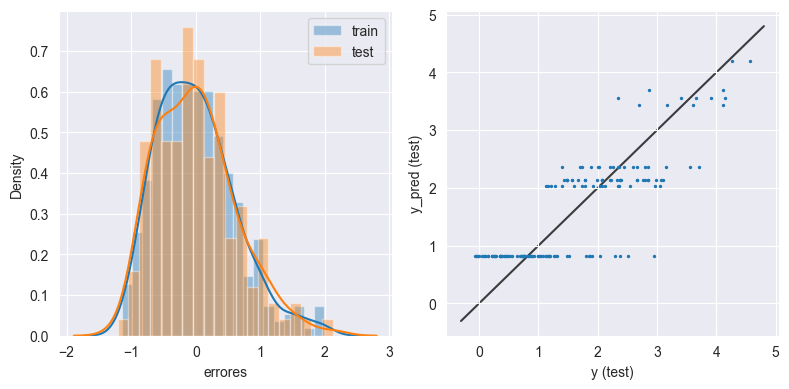

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.1203668793908445
Raíz del error cuadrático medio en Test: 0.18764011269994182


/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/federicomoreno/PycharmProjects/UCEMA/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


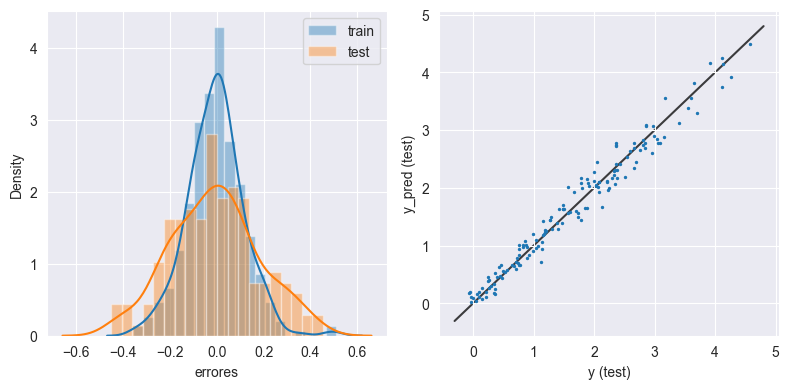

In [30]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Ejercicio
 * Probar cambiar `max_depth` y de `n_neighbors`.

 * ¿Cual es el mejor modelo dado este dataset?

 * Aplica uno de estos modelos a tu dataset